# Preparation

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
raw_data = pd.read_csv('data_perm_take_home.csv', encoding = "ISO-8859-1", engine='python')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61613 entries, 0 to 61612
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   case_number                61613 non-null  object 
 1   case_received_date         61611 non-null  object 
 2   decision_date              61613 non-null  object 
 3   case_status                61613 non-null  object 
 4   employer_name              61611 non-null  object 
 5   employer_num_employees     61593 non-null  float64
 6   employer_yr_established    61577 non-null  float64
 7   job_education              61609 non-null  object 
 8   job_experience_num_months  33996 non-null  float64
 9   job_state                  61602 non-null  object 
 10  job_foreign_lang_req       61611 non-null  object 
 11  job_level                  57066 non-null  float64
 12  employee_citizenship       61604 non-null  object 
 13  wage_offer                 61598 non-null  flo

In [4]:
raw_data.head()

,case_number,case_received_date,decision_date,case_status,employer_name,employer_num_employees,employer_yr_established,job_education,job_experience_num_months,job_state,job_foreign_lang_req,job_level,employee_citizenship,wage_offer,wage_unit
0,A-06191-36805,12/22/14,6/19/15,Certified,BRENTWOOD BIOMEDICAL RESEARCH INSTITUTE,149.0,1988.0,Bachelor's,NaN,CALIFORNIA,N,1.0,RUSSIA,30285.0,Year
1,A-07194-56311,12/19/14,6/19/15,Denied,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,NaN,WASHINGTON,N,2.0,RUSSIA,150000.0,Year
2,A-07194-56513,12/17/14,6/19/15,Certified,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,NaN,WASHINGTON,N,2.0,INDIA,125000.0,Year
3,A-07194-56514,10/9/14,3/3/15,Certified,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,84.0,WASHINGTON,N,3.0,CANADA,105300.0,Year
4,A-07197-57029,10/6/14,3/3/15,Certified,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,NaN,WASHINGTON,N,1.0,ARGENTINA,114285.0,Year


# Part 1
1. Which employer has the most entries in the dataset?
2. Which employer has the most “Certified-Expired” cases?
3. How many unique employers contain the character string "APPLE" that is not "APPLE INC."?
4. Write a function that plots a histogram with 50 bins of the duration between from case_received_date to decision_date for any given employeer_name. Use the function to plot for "APPLE INC." and "GOOGLE INC."


## ANSWER

1. COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION, having 5441 cases.
2. MICROSOFT CORPORATION, having 521 'Certified-Expired' cases.
3. 6.
4. Check the answer below.


**Please check all code work below**

In [5]:
# 1

# Check primary key
print(raw_data['case_number'].unique().shape)

# Find most entries employer
raw_data.groupby('employer_name')['case_number'].count().sort_values(ascending=False).head()

(61613,)


employer_name
COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION    5441
INTEL CORPORATION                                1611
CISCO SYSTEMS, INC.                              1028
GOOGLE INC.                                       914
QUALCOMM TECHNOLOGIES INC.                        862
Name: case_number, dtype: int64

In [6]:
# 2

# 'Certified-Expired' is one value in column 'case_status'
raw_data[raw_data['case_status'] == 'Certified-Expired'].groupby('employer_name')['case_number'].count().sort_values(ascending=False).head()

employer_name
MICROSOFT CORPORATION         521
CISCO SYSTEMS, INC.           398
QUALCOMM TECHNOLOGIES INC.    269
GOOGLE INC.                   253
AMAZON CORPORATE LLC          231
Name: case_number, dtype: int64

In [7]:
# 3

# Get all employers with name containing 'APPLE'
raw_data[raw_data['employer_name'].str.contains("APPLE", na=False)]['employer_name'].unique()

# Totally 7 employers, minus 'APPLE INC.', then get 6.

array(['APPLE INC.', 'APPLETREE EARLY LEARNING PUBLIC CHARTER SCHOOLS',
       'APPLEXUS TECHNOLOGIES LLC', 'APPLETON GRP LLC',
       'APPLE EDUCATIONAL SERVICES', 'BIG APPLE EDUCATION CENTER INC.',
       'APPLE FEDERAL CREDIT UNION'], dtype=object)

In [8]:
# 4

def get_hist(df, employer_name):
    df = df[df['employer_name'] == employer_name]
    case_received_date = pd.to_datetime(df['case_received_date'])
    decision_date = pd.to_datetime(df['decision_date'])
    duration = pd.to_datetime(df['decision_date']) - pd.to_datetime(df['case_received_date'])
    duration = pd.DataFrame(duration.apply(lambda x: x.days), columns=[employer_name])
    hist = duration.hist(bins=50)
    return hist

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E79C77940>]],
      dtype=object)

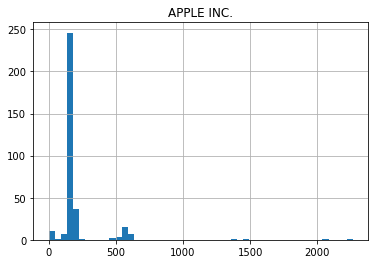

In [9]:
get_hist(raw_data, 'APPLE INC.')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E78CDEFD0>]],
      dtype=object)

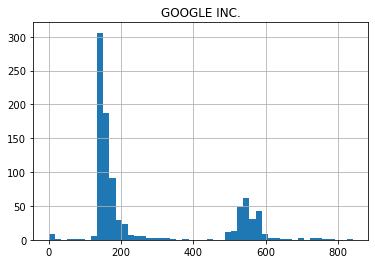

In [10]:
get_hist(raw_data, 'GOOGLE INC.')

# Part 2
For certified cases (case_status = “Certified”), build a model that predicts wage_offered by using 5 features**
with the most predictive power. Some considerations:
- How does the response variable look? How do the predictors look?
- How might missing values be handled?
- What transformations are relevant?
- Are there any outliers?
- What additional features could be engineered?
- What features are most predictive of wage_offered?
- Which model is picked? What advantages does the model offer against an alternative?
- What do the errors/residuals and their distributions tell us?
- How well do you think this model will extrapolate

## Summary

- The response variable is numerical, the predictors are in (date, categorical, numerical) types.
- For response variable (referred as target below), the missing values are simply dropped since the number is not large. For predictors (referred as Features below), the missing values are handled differently. `job_experience_num_months` has too many missing so just drop this column for convenience. Other columns use corresponding median to impute.
- The target `wage_offer` would be different given by different `wage_unit`. Thus we need a uniform transformation here. Assuming Year = 12 Months = 50 Weeks = 2000 Hours, change all `wage_offer` into Year format.
- There're defenite outliers for each columns. However for convenience, I would skip the outliers detection step. (The dataset is pretty large, the outliers effects will be decreased.)
- For Feature Engineering, please check more explaination in Feature Engineering subtitle.
- To determine the most predictive feature, we need to run the model with all features to get the `feature importance`. According below work, the most predictive feature is `employer_mean_wage`.
- The model I picked is Random Forest. 
    - It's easy to explain and implemented.
    - Not likely to overfit.
    - Robust to categorical features.
- According to the histogram plot below, most of the points are well fitted, the bias was mainly caused by outliers.
- No, the mean wage is 95,000 per year which is much more than US mean, the dataset distribution is totally different with US population.
- Improvement:
    - Process Outlier
    - More detailed feature engineering work
    - Prevent data leakage issue
    - Hyper-parameter tuning
    - Try more complex algorithm


## Data Cleaning

In [11]:
data = raw_data[raw_data['case_status'] == 'Certified']
data.set_index('case_number', inplace=True)
print('data shape:', data.shape)

data shape: (37930, 14)


In [12]:
# Clean response variable

# Find there're different wage units
print('Wage Unit Type: ', data['wage_unit'].unique())

# Drop nan value
data.dropna(subset=['wage_offer', 'wage_unit'], inplace=True)

# Uniform all wage_unit to Year
# Assuming Year = 12 Months = 50 Weeks = 2000 Hours
unit_dict = {'Year': 1, 'Month': 12, 'Week': 50, 'Hour': 2000}
unit_number = data['wage_unit'].apply(lambda x: unit_dict[x])
data['wage_offer'] = data['wage_offer'] * unit_number
data.drop(columns=['wage_unit'], inplace=True)

print('data shape:', data.shape)
print('wage_offer mean:',data['wage_offer'].mean())

Wage Unit Type:  ['Year' 'Hour' nan 'Month' 'Week']
data shape: (37565, 13)
wage_offer mean: 95201.17822787169


In [13]:
# Clean Features

# Due to column 'job_experience_num_months' has too many nan value, we just drop the column for convenience.

total_feature_name = ['case_received_date', 'decision_date', 'employer_name',
                'employer_num_employees', 'employer_yr_established', 'job_education',
                'job_state', 'job_foreign_lang_req', 'job_level', 'employee_citizenship']


# Impute columns with median
def impute_by_mean(df):
    df.fillna(df.median(), inplace=True)
    
impute_by_mean(data)

## Feature Engineering

1. Date Feature. There're 2 date columns `decision_date` & `case_received_date`. Here we calculation the duarition for both dates and considered the duarition as one predictive feature.
2. Catgorical Feature. There're multiple categorical features. Some simple categorical columns `job_education`, `job_foreign_lang_req` would be used as label encoding. For other categorical columns `employer_name`, `job_state`, `employee_citizenship` would be processed by target mean encoding, since the class number are large.

In [14]:
# Case Duration Feature
def get_duration(df):
    duration = pd.to_datetime(df['decision_date']) - pd.to_datetime(df['case_received_date'])
    return duration.apply(lambda x: x.days)

In [15]:
# Target Mean Encoding
def mean_wage_encoding(df, column):
    
    encoding_dict = df.groupby(column)['wage_offer'].mean()
    default_mean = df['wage_offer'].mean()
    
    return df[column].apply(lambda x: encoding_dict.get(x, default_mean))

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

def feature_tranform(df):
    df['duration'] = get_duration(df)
    df['employer_mean_wage'] = mean_wage_encoding(df, 'employer_name')
    df['state_mean_wage'] = mean_wage_encoding(df, 'job_state')
    df['citizen_mean_wage'] = mean_wage_encoding(df, 'employee_citizenship')
    
    df['job_education'] = le.fit_transform(df['job_education'])
    df['job_foreign_lang_req'] = le.fit_transform(df['job_foreign_lang_req'])
    return df

DATA = feature_tranform(data)

## Modeling

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

feature_name = ['employer_num_employees', 'employer_yr_established', 'job_education', 'job_experience_num_months', 
         'job_foreign_lang_req', 'job_level', 'duration', 'employer_mean_wage', 'state_mean_wage', 'citizen_mean_wage']

X = DATA[feature_name]
y = DATA['wage_offer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
reg = RandomForestRegressor(random_state=0)
reg.fit(X_train, y_train)

dict(zip(feature_name, reg.feature_importances_))

{'employer_num_employees': 0.02983592484680458,
 'employer_yr_established': 0.019606441875842644,
 'job_education': 0.009773653500957045,
 'job_experience_num_months': 0.010743082822701719,
 'job_foreign_lang_req': 0.0006214114232062333,
 'job_level': 0.026386892610025133,
 'duration': 0.032031890664900815,
 'employer_mean_wage': 0.8317521990929074,
 'state_mean_wage': 0.017870984735958686,
 'citizen_mean_wage': 0.02137751842669555}

In [18]:
# Train with best 5 features

best_feature = ['employer_mean_wage',  'duration', 'employer_num_employees', 'job_level', 'citizen_mean_wage']

X = DATA[best_feature]
y = DATA['wage_offer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
reg = RandomForestRegressor(random_state=0)
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [19]:
# Predict and get residual

y_pred = reg.predict(X_test)
residual = (y_pred - y_test)

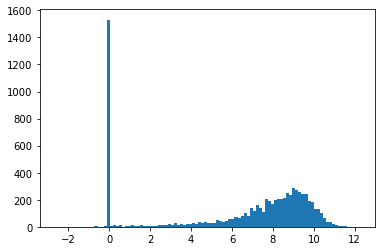

In [20]:
# Plot hist for residual
import matplotlib.pyplot as plt

plot = plt.hist(np.log(residual + 1), bins=100)